In [1]:
import joblib

X_train_bal_scaled, y_train_bal = joblib.load('fraud_detection/data/processed/train.pkl')
X_val_scaled, y_val = joblib.load('fraud_detection/data/processed/val.pkl')
X_test_scaled, y_test = joblib.load('fraud_detection/data/processed/test.pkl')

In [2]:
#logic regression (LR)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train_bal_scaled, y_train_bal)

#evaluation on the validation set
y_val_pred = lr.predict(X_val_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

y_val_proba = lr.predict_proba(X_val_scaled)[:, 1] #class '1' probability
roc_val = roc_auc_score(y_val, y_val_proba)
print("ROC-AUC (val):", roc_val)

Confusion Matrix:
[[170337  12164]
 [   958  16521]]
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9944    0.9333    0.9629    182501
         1.0     0.5759    0.9452    0.7158     17479

    accuracy                         0.9344    199980
   macro avg     0.7852    0.9393    0.8393    199980
weighted avg     0.9578    0.9344    0.9413    199980

ROC-AUC (val): 0.9792607822932055


In [3]:
#random forest (RF)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=None,
                            random_state=42)
rf.fit(X_train_bal_scaled, y_train_bal)

y_val_pred = rf.predict(X_val_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("Classification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

y_val_proba = rf.predict_proba(X_val_scaled)[:, 1]
roc_val = roc_auc_score(y_val, y_val_proba)
print("ROC-AUC (val):", roc_val)

Confusion Matrix:
[[182501      0]
 [     1  17478]]
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000    182501
         1.0     1.0000    0.9999    1.0000     17479

    accuracy                         1.0000    199980
   macro avg     1.0000    1.0000    1.0000    199980
weighted avg     1.0000    1.0000    1.0000    199980

ROC-AUC (val): 1.0


In [4]:
#XGBOOST 
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, n_estimators=100)
xgb_model.fit(X_train_bal_scaled, y_train_bal)

y_val_pred = xgb_model.predict(X_val_scaled)
print("XGB Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("XGB Classification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

y_val_proba = xgb_model.predict_proba(X_val_scaled)[:, 1]
roc_val = roc_auc_score(y_val, y_val_proba)
print("XGB ROC-AUC (val):", roc_val)

XGB Confusion Matrix:
[[182304    197]
 [    55  17424]]
XGB Classification Report:
              precision    recall  f1-score   support

         0.0     0.9997    0.9989    0.9993    182501
         1.0     0.9888    0.9969    0.9928     17479

    accuracy                         0.9987    199980
   macro avg     0.9943    0.9979    0.9961    199980
weighted avg     0.9987    0.9987    0.9987    199980

XGB ROC-AUC (val): 0.999984782761931


In [5]:
#neural network
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train_bal_scaled.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_bal_scaled, y_train_bal,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_scaled, y_val))

import numpy as np
y_val_proba = model.predict(X_val_scaled).ravel()
y_val_pred = (y_val_proba > 0.5).astype(np.int32)

print("NN Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("NN Classification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

roc_val = roc_auc_score(y_val, y_val_proba)
print("NN ROC-AUC (val):", roc_val)

Epoch 1/10


C:\Users\kamil\Documents\pythonProject1\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39928/39928 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - accuracy: 0.9811 - loss: 0.0627 - val_accuracy: 0.9941 - val_loss: 0.0142
Epoch 2/10
39928/39928 ━━━━━━━━━━━━━━━━━━━━ 40s 992us/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9964 - val_loss: 0.0086
Epoch 3/10
39928/39928 ━━━━━━━━━━━━━━━━━━━━ 40s 995us/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9968 - val_loss: 0.0075
Epoch 4/10
39928/39928 ━━━━━━━━━━━━━━━━━━━━ 40s 988us/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9970 - val_loss: 0.0080
Epoch 5/10
39928/39928 ━━━━━━━━━━━━━━━━━━━━ 39s 985us/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9980 - val_loss: 0.0059
Epoch 6/10
39928/39928 ━━━━━━━━━━━━━━━━━━━━ 39s 985us/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9973 - val_loss: 0.0077
Epoch 7/10
39928/39928 ━━━━━━━━━━━━━━━━━━━━ 40s 989us/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9973 - val_loss: 0.0068
Epoch 8/10
39928/39928 ━━━━━━━━━━━━━━━━━━━━ 40s 996us/step - accurac

In [6]:
#grid search / random search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid=param_grid,
                         scoring='f1',
                         cv=3,      #3-fold cross-validation
                         n_jobs=-1)
grid_search.fit(X_train_bal_scaled, y_train_bal)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Params: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.9999569498123181


In [7]:
'''
Key metrics // 
precision: what percentage of our "fraud predictions" actually turned out to be fraud
recall: how many real frauds have we uncovered
F1-score: Harmonic mean precision and recall, pays attention to the balance between these measures
ROC-AUC: Area under the ROC curve (True Positive Rate vs. False Positive Rate)
Confusion Matrix: summary of TN, FP, FN, TP (how many normal transactions we detected correctly, how many false positives, etc.)
'''

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba))


[[182220    281]
 [    55  17424]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182501
         1.0       0.98      1.00      0.99     17479

    accuracy                           1.00    199980
   macro avg       0.99      1.00      0.99    199980
weighted avg       1.00      1.00      1.00    199980

ROC-AUC: 0.9999751889927158


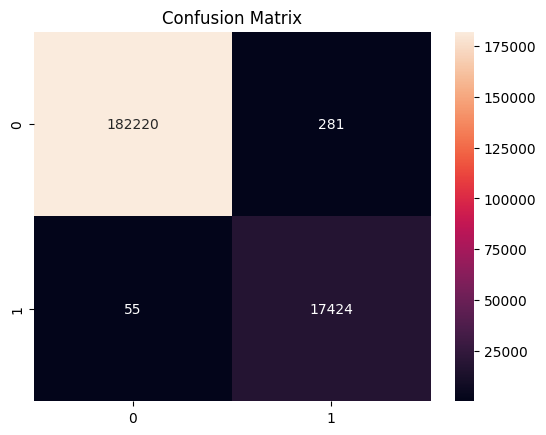

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
